# BREAST CANCER PREDICTION

Wisconsin Diagnosis Breast Cancer(WDBC) Data Set is being used.

In [2]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [1]:
#import cancer library from sklearn_library
from sklearn.datasets import load_breast_cancer
bc_data=load_breast_cancer()

In [3]:
bc_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
bc_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
bc_data['data'].shape

(569, 30)

In [6]:
#create a dataframe using the data
#we are going to include 30 columns of all the fature datas plus one column of target data

df_bc_data=pd.DataFrame(np.c_[bc_data['data'],bc_data['target']],columns=np.append(bc_data['feature_names'],['diagnosis']))

In [7]:
df_bc_data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890        0.0  
1          0.2750                  0.08902        0.0  
2          0.3613                  0.08758        0.0  
3          0.6638                  0.17300        0.0  
4          0.2364                  0.07678        0.0  

[5 rows x 31 columns]

In [8]:
df_bc_data.shape

(569, 31)

In [9]:
#there are no null data
df_bc_data.isnull().sum()
df_bc_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [10]:
df_bc_data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension   diagnosis  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [11]:
#the number of Benign and Malignant cases from the dataset.
#The majority cases are Benign(1)
df_bc_data.groupby('diagnosis').size()

diagnosis
0.0    212
1.0    357
dtype: int64

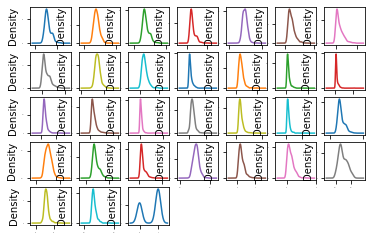

In [12]:
#visualize the density plots to get the data distribution.
#The data shows a general gaussian distribution is given here.
df_bc_data.plot(kind='density',subplots=True,layout=(5,7),sharex=False,legend=False,fontsize=1)
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

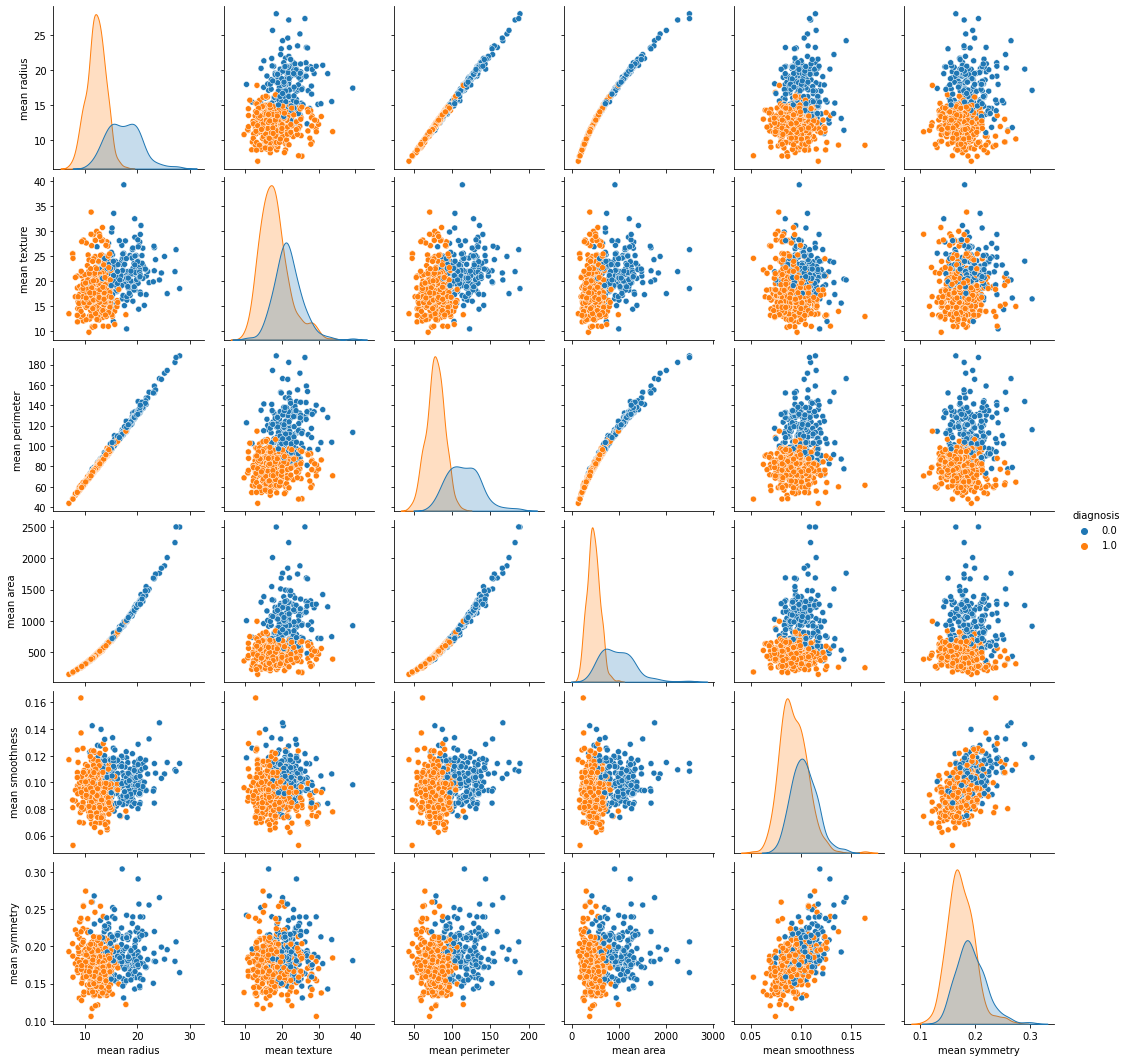

In [13]:
sns.pairplot(df_bc_data,hue='diagnosis',vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness','mean symmetry',])

<AxesSubplot:>

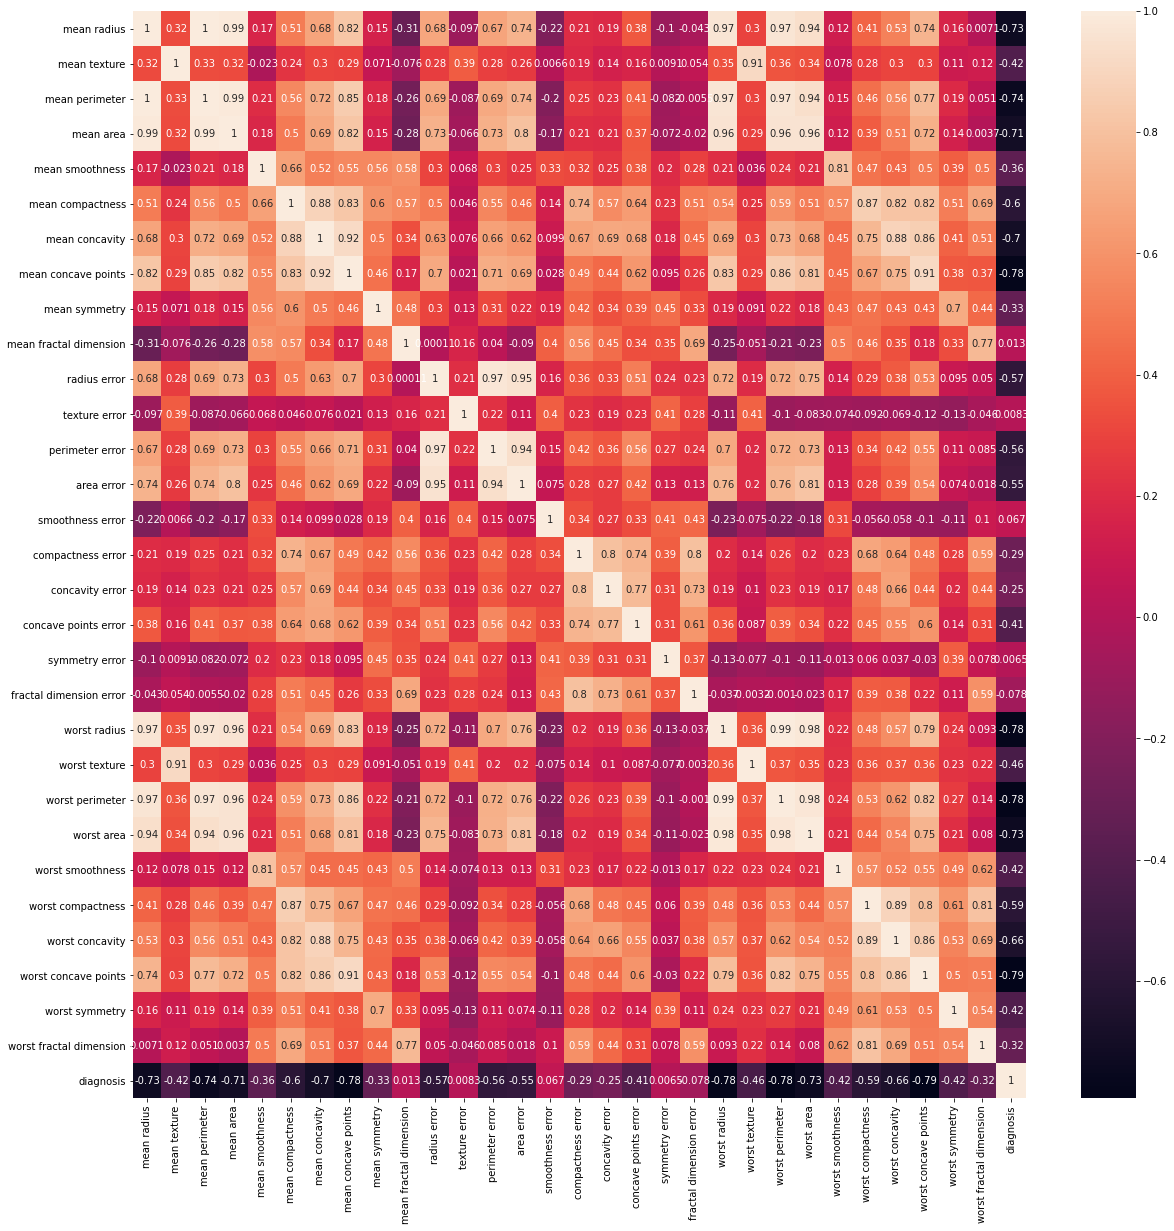

In [14]:
#Plot rectangular data as a color-encoded matrix. Using it to check the correlation between data usnig HEATMAP.
plt.figure(figsize=(20,20))
sns.heatmap(df_bc_data.corr(),annot=True)

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

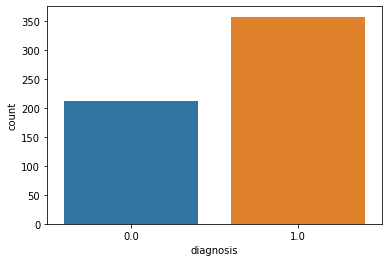

In [15]:
#The count of classes
sns.countplot(df_bc_data['diagnosis'],label="Count")

## MODEL TRAINING

we are using support vector machine classification algorithm

In [16]:
#define X and y
X=df_bc_data.drop(['diagnosis'],axis=1)
y=df_bc_data['diagnosis']

In [17]:
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [18]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: diagnosis, dtype: float64

In [19]:
#split data into training and testing with a ratio of 80:20 using sklearn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21)

In [20]:
X_train.shape

(455, 30)

In [21]:
X_test.shape

(114, 30)

In [22]:
y_train.shape

(455,)

In [23]:
y_test.shape

(114,)

In [24]:
df=y_test
df.to_csv('y_test.csv')

In [25]:
df1=X_test
df1.to_csv('X_test.csv')

In [26]:
#train the model using SVM algorithm
svc=SVC(gamma='auto')
svc.fit(X_train,y_train)

SVC(gamma='auto')

In [27]:
#accuracy on training and testing set
print("Accuracy on the training set:{:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on the test set:{:.2f}".format(svc.score(X_test,y_test)))

Accuracy on the training set:1.00
Accuracy on the test set:0.66


The model OVERFITS substantially,with a perfect score on the training set and only 66% accuracy on the test set.

## EVALUAING THE MODEL

<AxesSubplot:>

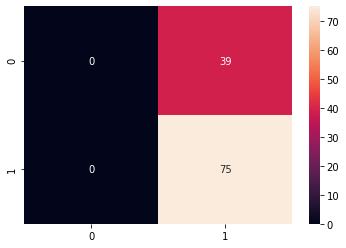

In [28]:
#predict using the trained model
y_predict=svc.predict(X_test)
#create a confusion matrix
cm=confusion_matrix(y_test,y_predict)
#prepare heatmap
sns.heatmap(cm,annot=True)

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        39
         1.0       0.66      1.00      0.79        75

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\

## IMPROVING THE MODEL

#### Normalizing the data

In [64]:
#Normalization of the data is done
from sklearn.preprocessing import MinMaxScaler
num_folds = 10
norm = MinMaxScaler().fit(X_train)
rescaledXn=norm.transform(X_train)
c_values=[0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
svc=SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result=grid.fit(rescaledXn,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971401 using {'C': 0.9, 'kernel': 'rbf'}
0.953816 (0.032097) with: {'C': 0.1, 'kernel': 'linear'}
0.969227 (0.026461) with: {'C': 0.1, 'kernel': 'poly'}
0.945024 (0.043607) with: {'C': 0.1, 'kernel': 'rbf'}
0.536039 (0.071373) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.960386 (0.034091) with: {'C': 0.3, 'kernel': 'linear'}
0.964928 (0.028161) with: {'C': 0.3, 'kernel': 'poly'}
0.960338 (0.039548) with: {'C': 0.3, 'kernel': 'rbf'}
0.355749 (0.062080) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.964831 (0.031568) with: {'C': 0.7, 'kernel': 'linear'}
0.958357 (0.033339) with: {'C': 0.7, 'kernel': 'poly'}
0.967053 (0.038702) with: {'C': 0.7, 'kernel': 'rbf'}
0.302947 (0.046863) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.967053 (0.033144) with: {'C': 0.9, 'kernel': 'linear'}
0.953913 (0.028642) with: {'C': 0.9, 'kernel': 'poly'}
0.971401 (0.037247) with: {'C': 0.9, 'kernel': 'rbf'}
0.289807 (0.044037) with: {'C': 0.9, 'kernel': 'sigmoid'}
0.967053 (0.033144) with: {'C': 1.0, 'kernel': 'linear'

In [65]:
#training on normal data
svc_model = SVC(gamma=0.1,C=0.9, kernel='rbf')
svc_model.fit(rescaledXn, y_train)

SVC(C=0.9, gamma=0.1)

In [66]:
#prepare the model on normal data
norm_scaler = MinMaxScaler().fit(X_train)
X_train_scaled_norm = norm_scaler.transform(X_train)
final_model = SVC(gamma=0.1,C=0.9, kernel='rbf')
start = time.time()
final_model.fit(X_train_scaled_norm, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.005983


In [67]:
# estimate accuracy on test dataset
X_test_scaled_norm = norm_scaler.transform(X_test)
predictions = final_model.predict(X_test_scaled_norm)

In [68]:
#calssification report
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test,y_predict))

Accuracy score 0.956140
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        39
         1.0       0.94      1.00      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

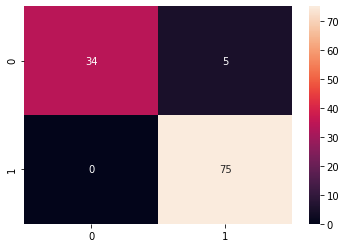

In [69]:
# predict using the trained model
y_predict = svc_model.predict(X_test_scaled_norm)
#create confusion matrix
cm = confusion_matrix(y_test, y_predict)
# prepare heatmap
sns.heatmap(cm, annot= True)

### Algorithm Tuning - Tuning SVM

We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel. The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF). We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid.

#### Standardize the dataset

In [70]:
#grid search cross validation done
num_folds = 10
scalar=StandardScaler().fit(X_train)
rescaledX=scalar.transform(X_train)
c_values=[0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
svc=SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result=grid.fit(rescaledX,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [71]:
#grid search to find the best hyperparameters
std_scaler = StandardScaler().fit(X_train)
svc_xtrain = std_scaler.transform(X_train)
svc_xtest = std_scaler.transform(X_test)

df_classi = SVC(random_state=999)

params_svc = {'C': [0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0],'gamma': [0.01,0.1,1,10]}

gs_SVC = GridSearchCV(estimator=df_classi, param_grid=params_svc,  cv=10, verbose=1, scoring='accuracy')

gs_SVC.fit(rescaledX,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=SVC(random_state=999),
             param_grid={'C': [0.1, 0.3, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
                         'gamma': [0.01, 0.1, 1, 10]},
             scoring='accuracy', verbose=1)

In [72]:
#grid search best parameter
gs_SVC.best_params_

{'C': 1.7, 'gamma': 0.01}

In [73]:
#grid search best score
gs_SVC.best_score_

0.9671014492753625

In [74]:
results_SVC = pd.DataFrame(gs_SVC.cv_results_['params'])
results_SVC['test_score'] = gs_SVC.cv_results_['mean_test_score']
results_SVC.columns

Index(['C', 'gamma', 'test_score'], dtype='object')

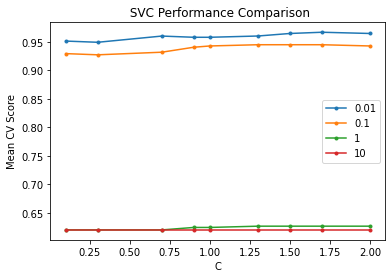

In [75]:
#plotting the hyperparameters
for i in [0.01,0.1,1,10]:
    temp_svc = results_SVC[results_SVC['gamma'] == i]
    temp_average_svc = temp_svc.groupby('C').agg({'test_score': 'mean'})
    plt.plot(temp_average_svc, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title(" SVC Performance Comparison")
plt.show()

In [76]:
#prepare the model
std_scaler = StandardScaler().fit(X_train)
svc_xtrain = std_scaler.transform(X_train)
final_model = SVC(gamma=0.1,C=2.0, kernel='rbf')
start = time.time()
final_model.fit(svc_xtrain, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.009971


In [77]:
# estimate accuracy on test dataset
svc_xtest = std_scaler.transform(X_test)
predictions = final_model.predict(svc_xtest)

In [78]:
#classification report and accuracy on test set
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.991228
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.99      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



<AxesSubplot:>

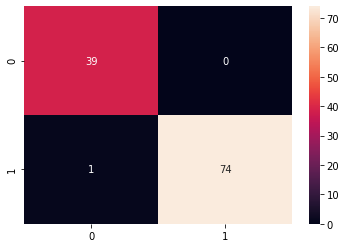

In [79]:
#confusion matrix using heatmap
cm_final=confusion_matrix(y_test,predictions)
sns.heatmap(cm_final,annot=True)

In [80]:
#accuracy on test an train set
print("Accuracy on training set:{:.2f}".format(final_model.score(svc_xtrain,y_train)))
print("Accuracy on test set:{:.2f}".format(final_model.score(svc_xtest,y_test)))

Accuracy on training set:0.99
Accuracy on test set:0.99


comparison of train and test score with g=0.01 and various C values

In [81]:
test_scores = []
train_scores = []
c_val=[0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0]

for i in c_val:

    final_model = SVC(gamma=0.01,C=i, kernel='rbf')
    final_model.fit(svc_xtrain,y_train)
    
    train_scores.append(final_model.score(svc_xtrain,y_train))
    test_scores.append(final_model.score(svc_xtest,y_test))

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'accuracy score')

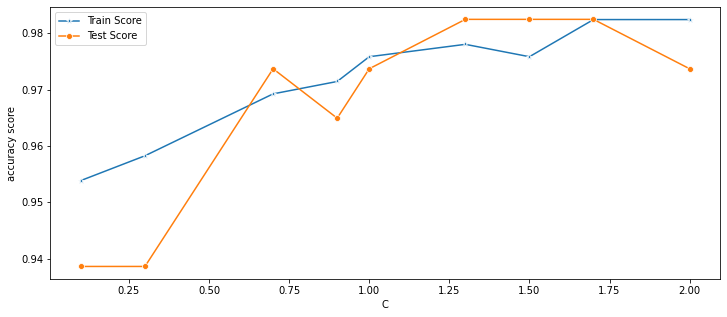

In [82]:
plt.figure(figsize=(12,5))
p = sns.lineplot(c_val,train_scores,marker='*',label='Train Score')
p = sns.lineplot(c_val,test_scores,marker='o',label='Test Score')
plt.xlabel('C')
plt.ylabel("accuracy score")

comparison of train and test score with g=0.1 and various C values

In [83]:
test_scores = []
train_scores = []
c_val=[0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0]

for i in c_val:

    final_model = SVC(gamma=0.1,C=i, kernel='rbf')
    final_model.fit(svc_xtrain,y_train)
    
    train_scores.append(final_model.score(svc_xtrain,y_train))
    test_scores.append(final_model.score(svc_xtest,y_test))

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'accuracy score')

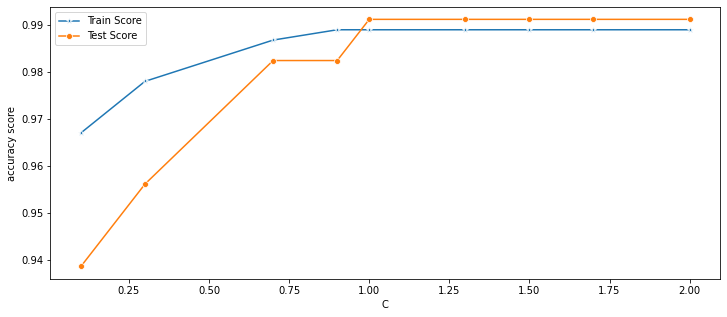

In [84]:
plt.figure(figsize=(12,5))
p = sns.lineplot(c_val,train_scores,marker='*',label='Train Score')
p = sns.lineplot(c_val,test_scores,marker='o',label='Test Score')
plt.xlabel('C')
plt.ylabel("accuracy score")

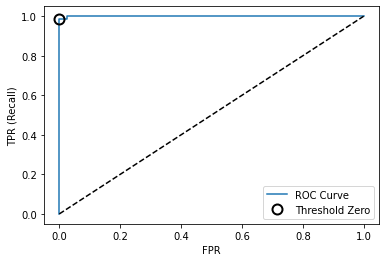

In [85]:
#ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,final_model.decision_function(svc_xtest))

plt.plot(fpr,tpr,label="ROC Curve")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
#find the threshold closest to zero
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label="Threshold Zero",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

In [86]:
#AUC
from sklearn.metrics import roc_auc_score
svc_auc = roc_auc_score(y_test, final_model.decision_function(svc_xtest))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for SVC: 1.000


### COMPARISON WITH OTHER ALGORITHMS

 Will any other algorithm give better accuracy than SVC?

We will compare Support Vector machine with Decision tree classifier, Gussian Nive Bayes and KNN Classifier.
We will fit these algorithm on the standardized dataset and compare the performance

In [53]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [54]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT',DecisionTreeClassifier())])))  
                                       
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))

pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))


results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, (cv_results.mean()*100), cv_results.std(), end-start))

ScaledDT: 91.434783 (0.033289) (run time: 0.379959)
ScaledSVM: 96.487923 (0.038621) (run time: 0.192538)
ScaledNB: 93.193237 (0.038625) (run time: 0.200550)
ScaledKNN: 95.835749 (0.038595) (run time: 0.349885)


We can see from the result the accuracy of various algorithm on the dataset. 

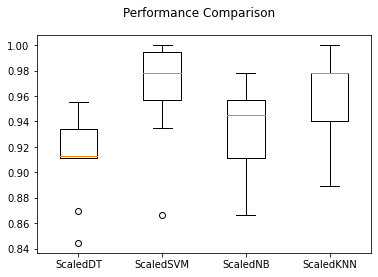

In [55]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

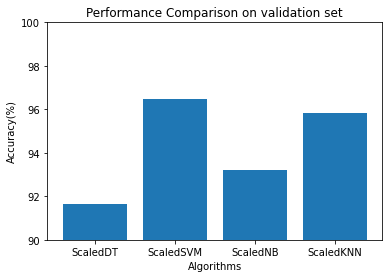

In [56]:
#accuracy comparison
res=[91.652174,96.487923,93.193237,95.835947]
plt.bar(names,res,align='center',alpha=1)
plt.ylim((90,100))
plt.title('Performance Comparison on validation set')
plt.ylabel('Accuracy(%)')
plt.xlabel('Algorithms')
plt.show()

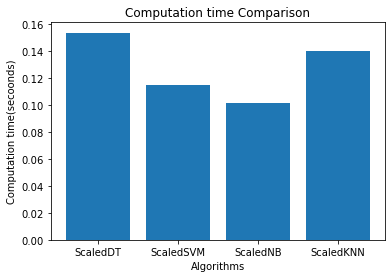

In [57]:
#computation time comparison
es=[0.153796,0.114700,0.101242,0.140144]
plt.bar(names,es,align='center',alpha=1)
plt.title('Computation time Comparison')
plt.ylabel('Computation time(secoonds)')
plt.xlabel('Algorithms')
plt.show()

linear kernel

In [89]:
from sklearn.svm import LinearSVC
#on general data
linsvc1=LinearSVC()
start = time.time()
linsvc1.fit(X_train, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predlin1 = linsvc1.predict(X_test)
print("Accuracy score %f" % accuracy_score(y_test, predlin1))
print(classification_report(y_test, predlin1))
lin_auc1 = roc_auc_score(y_test, linsvc1.decision_function(X_test))
print("AUC for SVC: {:.3f}".format(lin_auc1))

Run Time: 0.118109
Accuracy score 0.912281
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86        39
         1.0       0.90      0.97      0.94        75

    accuracy                           0.91       114
   macro avg       0.92      0.88      0.90       114
weighted avg       0.91      0.91      0.91       114

AUC for SVC: 0.968
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [90]:
#using standard data
linsvc2=LinearSVC()
start = time.time()
linsvc2.fit(svc_xtrain, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predlin2= linsvc2.predict(svc_xtest)
print("Accuracy score %f" % accuracy_score(y_test, predlin2))
print(classification_report(y_test, predlin2))
lin_auc2 = roc_auc_score(y_test, linsvc2.decision_function(svc_xtest))
print("AUC for SVC: {:.3f}".format(lin_auc2))

Run Time: 0.005983
Accuracy score 0.982456
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        39
         1.0       0.97      1.00      0.99        75

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC for SVC: 1.000


In [91]:
#using standard data and hyperparameter tuning
linsvc3=LinearSVC(C=0.1,loss="hinge")
start = time.time()
linsvc3.fit(svc_xtrain, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predlin3 = linsvc3.predict(svc_xtest)
print("Accuracy score %f" % accuracy_score(y_test, predlin3))
print(classification_report(y_test, predlin3))
lin_auc3 = roc_auc_score(y_test, linsvc3.decision_function(svc_xtest))
print("AUC for SVC: {:.3f}".format(lin_auc3))

Run Time: 0.004993
Accuracy score 0.991228
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        39
         1.0       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

AUC for SVC: 1.000


poynomial kernel

In [92]:
#on general data
polysvc1=SVC(kernel='poly')
start = time.time()
polysvc1.fit(X_train, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predpoly1 = polysvc1.predict(X_test)
print("Accuracy score %f" % accuracy_score(y_test, predpoly1))
print(classification_report(y_test, predpoly1))
poly_auc1 = roc_auc_score(y_test, polysvc1.decision_function(X_test))
print("AUC for SVC: {:.3f}".format(poly_auc1))

Run Time: 0.008013
Accuracy score 0.894737
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83        39
         1.0       0.88      0.97      0.92        75

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

AUC for SVC: 0.970


In [93]:
#using standard data
polysvc2=SVC(kernel='poly')
start = time.time()
polysvc2.fit(svc_xtrain, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predpoly2= polysvc2.predict(svc_xtest)
print("Accuracy score %f" % accuracy_score(y_test, predpoly2))
print(classification_report(y_test, predpoly2))
poly_auc2 = roc_auc_score(y_test, polysvc2.decision_function(svc_xtest))
print("AUC for SVC: {:.3f}".format(poly_auc2))

Run Time: 0.005995
Accuracy score 0.912281
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        39
         1.0       0.88      1.00      0.94        75

    accuracy                           0.91       114
   macro avg       0.94      0.87      0.90       114
weighted avg       0.92      0.91      0.91       114

AUC for SVC: 1.000


In [94]:
#using standard data and hyperparameter
polysvc3=SVC(kernel='poly',C=2.0,degree=3, coef0=1)
start = time.time()
polysvc3.fit(svc_xtrain, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predpoly3= polysvc3.predict(svc_xtest)
print("Accuracy score %f" % accuracy_score(y_test, predpoly3))
print(classification_report(y_test, predpoly3))
poly_auc3 = roc_auc_score(y_test, polysvc3.decision_function(svc_xtest))
print("AUC for SVC: {:.3f}".format(poly_auc3))

Run Time: 0.003989
Accuracy score 0.991228
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        39
         1.0       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

AUC for SVC: 1.000


In [95]:
#using standard data and hyperparameter
polysvc3=SVC(kernel='poly',C=2.0,degree=3, coef0=1)
start = time.time()
polysvc3.fit(svc_xtrain, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))
predpoly3= polysvc3.predict(svc_xtest)
print("Accuracy score %f" % accuracy_score(y_test, predpoly3))
print(classification_report(y_test, predpoly3))
poly_auc3 = roc_auc_score(y_test, polysvc3.decision_function(svc_xtest))
print("AUC for SVC: {:.3f}".format(poly_auc3))

Run Time: 0.004986
Accuracy score 0.991228
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        39
         1.0       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

AUC for SVC: 1.000


## comparison on cross validation set

In [96]:
kernel_list = []
kernel_list.append(('Linear', LinearSVC()))
kernel_list.append(('RBF', SVC(kernel='rbf'))) 
kernel_list.append(('Polynomial', SVC(kernel='poly')))
kernel_list.append(('Sigmoid', SVC(kernel='sigmoid')))

### unstandardised dataset

In [100]:
#finding accuracy
num_folds = 10
results = []
names = []

for name, model in kernel_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\s

In [102]:
#finding f1
num_folds = 10
results = []
names = []

for name, model in kernel_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\s

In [103]:
#finding roc_auc
num_folds = 10
results = []
names = []

for name, model in kernel_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\s

       Kernel  Accuracy    F-1  ROC-AUC
0      LINEAR     90.55  94.04    97.78
1         RBF     91.62  93.53    96.97
2  POLYNOMIAL     91.18  93.20    96.60
3     SIGMOID     41.77  54.51    23.15


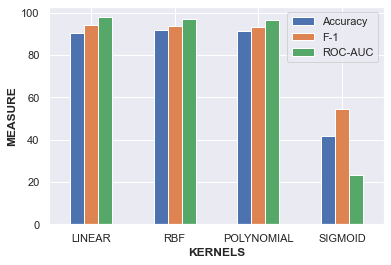

In [220]:
df1 = pd.DataFrame({
    'Kernel': ['LINEAR','RBF','POLYNOMIAL','SIGMOID'],
    'Accuracy': [90.55,91.62,91.18,41.77],
    'F-1': [94.04,93.53,93.20,54.51],
    'ROC-AUC':[97.78,96.97,96.60,23.15]
})

print(df1)
df1.head()

sns.set_style("darkgrid")
df1.plot(x="Kernel",y=["Accuracy","F-1","ROC-AUC"],kind="bar")
plt.xlabel("KERNELS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### standardised data

In [104]:

#finding accuracy
num_folds = 10
results = []
names = []

for name, model in kernel_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, svc_xtrain, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f) ()" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear: 0.969130 (0.014744) (run time: 0.069360) ()
RBF: 0.962560 (0.026103) (run time: 0.053817) ()
Polynomial: 0.894444 (0.032531) (run time: 0.048378) ()
Sigmoid: 0.953865 (0.027056) (run time: 0.044880) ()
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [105]:
#finding f1
num_folds = 10
results = []
names = []

for name, model in kernel_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, svc_xtrain, y_train, cv=kfold, scoring='f1')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f) ()" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear: 0.974673 (0.013140) (run time: 0.074839) ()
RBF: 0.970123 (0.020209) (run time: 0.063788) ()
Polynomial: 0.920734 (0.025496) (run time: 0.075798) ()
Sigmoid: 0.963248 (0.022788) (run time: 0.060837) ()


In [106]:
#finding roc_auc
num_folds = 10
results = []
names = []

for name, model in kernel_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, svc_xtrain, y_train, cv=kfold, scoring='roc_auc')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f) ()" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear: 0.988429 (0.014605) (run time: 0.072844) ()
RBF: 0.993260 (0.008888) (run time: 0.058850) ()
Polynomial: 0.988826 (0.012322) (run time: 0.060829) ()
Sigmoid: 0.988841 (0.014771) (run time: 0.054855) ()
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


       Kernel  Accuracy    F-1  ROC-AUC
0      LINEAR     96.91  97.46    98.84
1         RBF     96.25  97.00    99.32
2  POLYNOMIAL     89.44  92.07    98.88
3     SIGMOID     95.38  96.32    98.88


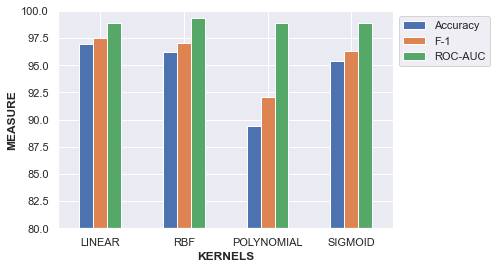

In [226]:
df2 = pd.DataFrame({
    'Kernel': ['LINEAR','RBF','POLYNOMIAL','SIGMOID'],
    'Accuracy': [96.91,96.25,89.44,95.38],
    'F-1': [97.46,97.0,92.07,96.32],
    'ROC-AUC':[98.84,99.32,98.88,98.88]
})

print(df2)
df2.head()

sns.set_style("darkgrid")
df2.plot(x="Kernel",y=["Accuracy","F-1","ROC-AUC"],kind="bar")
plt.xlabel("KERNELS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=0)
plt.ylim(80,100)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()

### standardised data and hyperparameter 

In [107]:
#finding accuracy
kernel_list_std = []
kernel_list_std.append(('Linear', LinearSVC(C=0.1,loss="hinge")))
kernel_list_std.append(('RBF', SVC(kernel='rbf',C=2.0,gamma=0.01))) 
kernel_list_std.append(('Polynomial', SVC(kernel='poly',C=2.0,degree=3, coef0=1)))
kernel_list_std.append(('Sigmoid', SVC(kernel='sigmoid',C=2.0)))
num_folds = 10
results = []
names = []

for name, model in kernel_list_std:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, svc_xtrain, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear: 0.966908 (0.022890) (run time: 0.032952)
RBF: 0.962512 (0.026318) (run time: 0.046835)
Polynomial: 0.966908 (0.030245) (run time: 0.036943)
Sigmoid: 0.955942 (0.032770) (run time: 0.037857)


In [108]:
#finding f1
kernel_list_std = []
kernel_list_std.append(('Linear', LinearSVC(C=0.1,loss="hinge")))
kernel_list_std.append(('RBF', SVC(kernel='rbf',C=2.0,gamma=0.01))) 
kernel_list_std.append(('Polynomial', SVC(kernel='poly',C=2.0,degree=3, coef0=1)))
kernel_list_std.append(('Sigmoid', SVC(kernel='sigmoid',C=2.0)))
num_folds = 10
results = []
names = []

for name, model in kernel_list_std:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, svc_xtrain, y_train, cv=kfold, scoring='f1')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear: 0.973227 (0.019994) (run time: 0.039894)
RBF: 0.969948 (0.021587) (run time: 0.064824)
Polynomial: 0.973675 (0.023956) (run time: 0.055850)
Sigmoid: 0.964516 (0.026604) (run time: 0.046875)


In [110]:
#finding roc_auc
kernel_list_std = []
kernel_list_std.append(('Linear', LinearSVC(C=0.1,loss="hinge")))
kernel_list_std.append(('RBF', SVC(kernel='rbf',C=2.0,gamma=0.01))) 
kernel_list_std.append(('Polynomial', SVC(kernel='poly',C=2.0,degree=3, coef0=1)))
kernel_list_std.append(('Sigmoid', SVC(kernel='sigmoid',C=2.0)))
num_folds = 10
results = []
names = []

for name, model in kernel_list_std:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, svc_xtrain, y_train, cv=kfold, scoring='roc_auc')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear: 0.992852 (0.011562) (run time: 0.033869)
RBF: 0.994125 (0.010181) (run time: 0.051682)
Polynomial: 0.992906 (0.011437) (run time: 0.046835)
Sigmoid: 0.988870 (0.009036) (run time: 0.048917)


       Kernel  Accuracy    F-1  ROC-AUC
0      LINEAR     96.69  97.32    99.28
1         RBF     96.25  96.99    99.41
2  POLYNOMIAL     96.69  97.36    98.29
3     SIGMOID     95.59  96.45    98.88


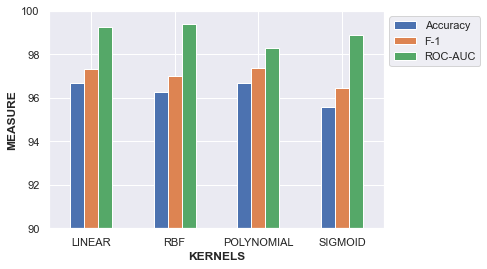

In [229]:
df3 = pd.DataFrame({
    'Kernel': ['LINEAR','RBF','POLYNOMIAL','SIGMOID'],
    'Accuracy': [96.69,96.25,96.69,95.59],
    'F-1': [97.32,96.99,97.36,96.45],
    'ROC-AUC':[99.28,99.41,98.29,98.88]
})

print(df3)
df3.head()

sns.set_style("darkgrid")
df3.plot(x="Kernel",y=["Accuracy","F-1","ROC-AUC"],kind="bar")
plt.xlabel("KERNELS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=0)
plt.ylim(90,100)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()